In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Compute $\kappa$ and $\iota$

In [2]:
E1, E2, n, C, f_c, f_a, Lambda_QCD, kappa, N, rho_c, g_0, g_osc, T_0, gamma, theta_i, eV = \
 sp.symbols("E1, E2, n, C, f_c, f_a, Lambda_QCD, kappa, N, rho_c, g_0, g_osc, T_0, gamma, theta_i, eV")
GeV = 10**9 * eV
T_osc = kappa * (E1 / (f_a / N))**(1/(1 + n/2)/2)
#m_a = 6*10**(-10) * eV * 10**16 * GeV / (f_a / N)
m_a = E2 * E1 / (f_a / N)
zeta = C * (Lambda_QCD / T_osc)**n # ok
m_a_osc = m_a * zeta # ok
# s up to a constant factor
s0 = g_0 * T_0**3 # ok
s_osc = g_osc * T_osc**3 # ok
n_a = f_c / 2 * m_a_osc * (f_a / N)**2 * theta_i**2 
rho_a = n_a * m_a * s0 / s_osc * gamma
Omega_a = rho_a / rho_c # ok
Omega_a

C*E1**2*E2**2*T_0**3*f_c*g_0*gamma*theta_i**2*(E1*N/f_a)**(-3/(2*(n/2 + 1)))*(Lambda_QCD*(E1*N/f_a)**(-1/(2*(n/2 + 1)))/kappa)**n/(2*g_osc*kappa**3*rho_c)

In [3]:
from numpy import pi
from util import *
import config
model = config.Model()
n = 4
C = 0.018
g_star = 61.75
kappa = ((10 * model.M_pl**2 / (pi**2 * g_star))**(1/4) * C**(1/2) * model.Lambda_QCD**(n/2) * (6e-10)**(1/2))**(1/(1 + n/2))
g_star_s0 = 3.91
g_star_s_osc = g_star 
f_c = 1.44
E1 = 1e16 * 1e9
E2 = 6e-10
#iota = (1e16 * 1e9)**(7/6) * h**2 * 18 * 10 ** (5 / 6) * C * Lambda_QCD**4 * T0**3 * f_c * g_star_s0 / (g_star_s_osc * kappa**7 * rho_c)
iota = (
    C * E1**2 * E2**2 * model.T0**3 * f_c * g_star_s0 * model.Lambda_QCD**n / 
    (2 * g_star_s_osc * model.rho_c * kappa**(3 + n)) 
    #model.h**2
)
show(kappa)
show(iota)

1.324162e+08 
2.339448e+04 


## Plot WKB Approximation 

In [4]:
N = 300
f_a = np.logspace(9, 18, N) * 1e9 # [eV]
theta_i = np.logspace(-5, 0, N) # [RAD]
F_A, THETA_I = np.meshgrid(f_a, theta_i)

In [5]:
Omega_a_h_sq = iota * (F_A / (1e16 * 1e9))**(7/6) * THETA_I**2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


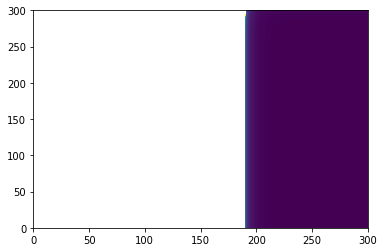

In [6]:
def F(x):
    return (np.log(np.exp(1) / (1 - x**2 / np.pi**2)))**(7 / 6)
H_I = 1e16 * 1e9
A = THETA_I**2 + (H_I / (2*np.pi*F_A))**2
correction_factor = A * F(np.sqrt(A))
plt.pcolormesh(correction_factor)

/home/janik/Documents/bachelor/density_plot.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq) , 10)


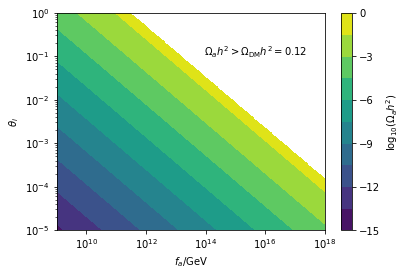

In [7]:
# plot
import density_plot
fig = density_plot.plot_density(theta_i, f_a, Omega_a_h_sq)
fig.savefig("Plots/qcd_relic_denstiy_wkb_plot.pdf")

AttributeError: 'NaN' object has no attribute 'log10'

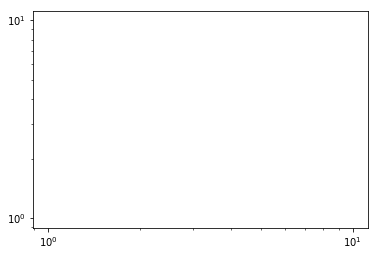

In [8]:
# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale("log")
ax.set_yscale("log")
plt.contourf(f_a / 1e9, theta_i, np.log10(Omega_a * correction_factor * model.h**2) , 10)
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
plt.text(0.55, 0.8, r"$\Omega_a h^2 > \Omega_\mathrm{DM} h^2 = 0.12$", transform=ax.transAxes)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\log_{10}(\Omega_a h^2)$")